In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import rioxarray
import scipy

In [3]:
def load_and_draw_entropy(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()
        metadata = {
                'count': src.count,           # Number of bands
                'width': src.width,
                'height': src.height,
                'dtype': src.dtypes[0],
                'crs': src.crs,
                'transform': src.transform,
                'bounds': src.bounds,
                'nodata': src.nodata
            }
    print(f"✓ Loaded with rasterio: {image.shape} ({metadata['dtype']})")
    print(f"  Bands: {metadata['count']}, Size: {metadata['width']}x{metadata['height']}")
    print(f"  CRS: {metadata['crs']}")
    kaz_entropy_map = np.zeros((metadata['height'], metadata['width']))
    normalized_logits = image/np.sum(image, axis=0)
    probs = scipy.special.softmax(normalized_logits, axis=0)
    kaz_entropy_map = scipy.stats.entropy(probs, axis=0)
    plt.imshow(kaz_entropy_map, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Entropy Heatmap')
    plt.show()

✓ Loaded with rasterio: (13, 242, 333) (uint8)
  Bands: 13, Size: 333x242
  CRS: EPSG:32614


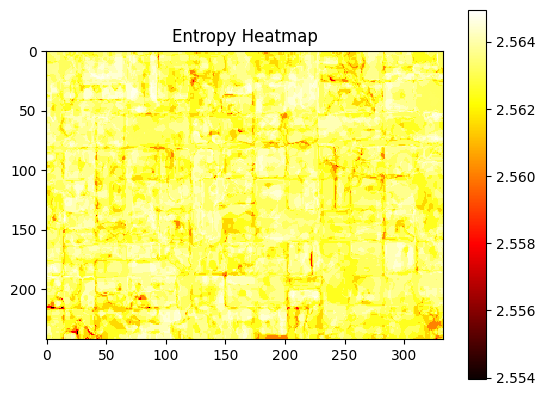

In [4]:
load_and_draw_entropy("merged_usa_pred_full_original.tif")

✓ Loaded with rasterio: (13, 416, 573) (uint8)
  Bands: 13, Size: 573x416
  CRS: EPSG:32642


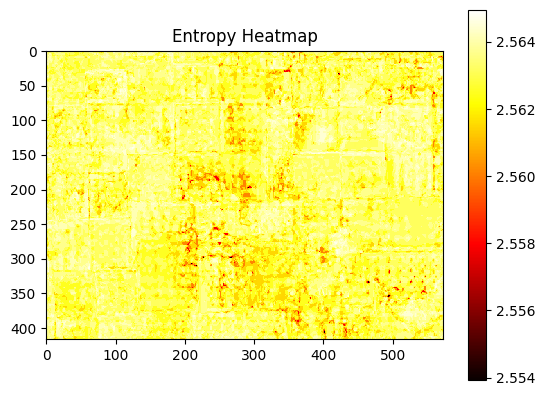

In [5]:
load_and_draw_entropy("kaz-rect_pred_full_original.tif")

In [6]:
def load_and_draw_nonzero(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()
        metadata = {
                'count': src.count,           # Number of bands
                'width': src.width,
                'height': src.height,
                'dtype': src.dtypes[0],
                'crs': src.crs,
                'transform': src.transform,
                'bounds': src.bounds,
                'nodata': src.nodata
            }
    print(f"✓ Loaded with rasterio: {image.shape} ({metadata['dtype']})")
    print(f"  Bands: {metadata['count']}, Size: {metadata['width']}x{metadata['height']}")
    print(f"  CRS: {metadata['crs']}")
    nonzero_map = np.count_nonzero(image, axis=0)
    plt.imshow(nonzero_map, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Non-zero Count Heatmap')
    plt.show()

✓ Loaded with rasterio: (13, 242, 333) (uint8)
  Bands: 13, Size: 333x242
  CRS: EPSG:32614


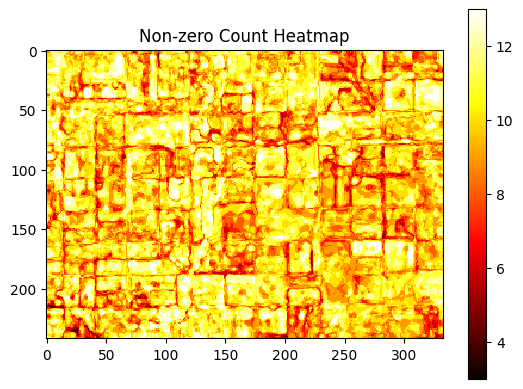

In [7]:
load_and_draw_nonzero("merged_usa_pred_full_original.tif")

✓ Loaded with rasterio: (13, 416, 573) (uint8)
  Bands: 13, Size: 573x416
  CRS: EPSG:32642


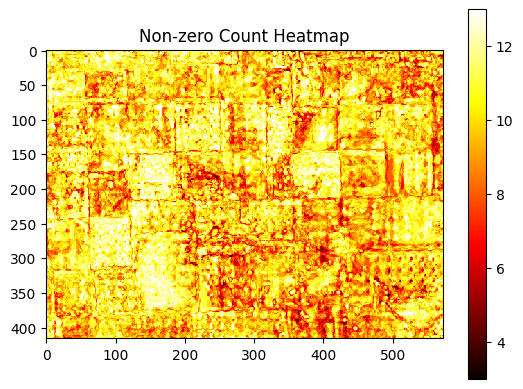

In [8]:
load_and_draw_nonzero("kaz-rect_pred_full_original.tif")

✓ Loaded with rasterio: (13, 759, 498) (uint8)
  Bands: 13, Size: 498x759
  CRS: EPSG:32643


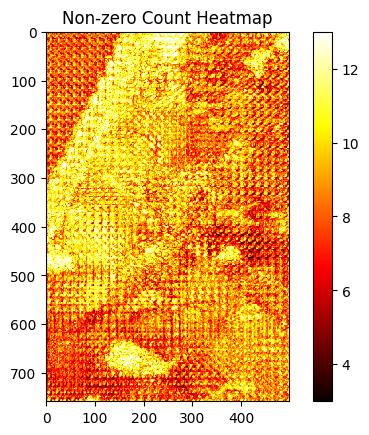

In [9]:
load_and_draw_nonzero("54_pred_full_original.tif")